<a href="https://colab.research.google.com/github/yaman9675/Telco-customer-churn/blob/main/M4W2D2_Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
telco = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
telco.shape

(7043, 21)

In [ ]:
telco.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [ ]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Exploratory Data Analysis

In [ ]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Churn Count
telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

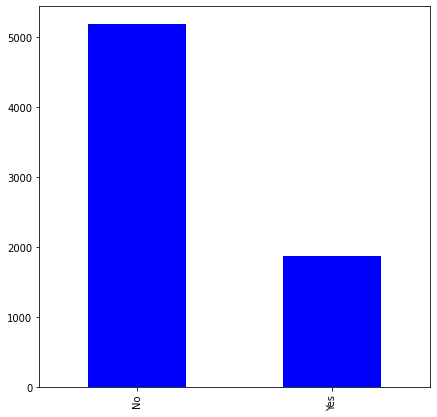

In [ ]:
# Plot Churn Count
plt.figure(figsize=(7,7))
churn_count = telco['Churn'].value_counts()
churn_count.plot(kind='bar', color = 'blue')

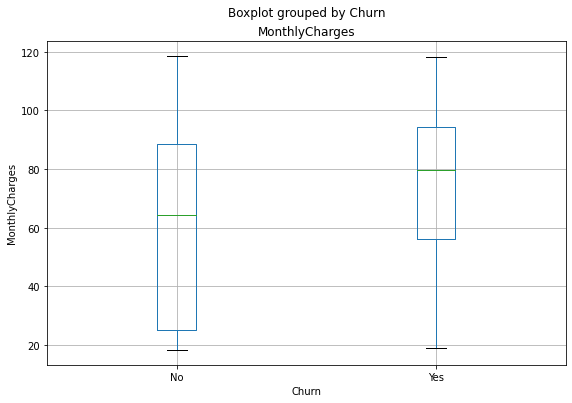

In [ ]:
# Monthly Charges v/s Churn
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
telco.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

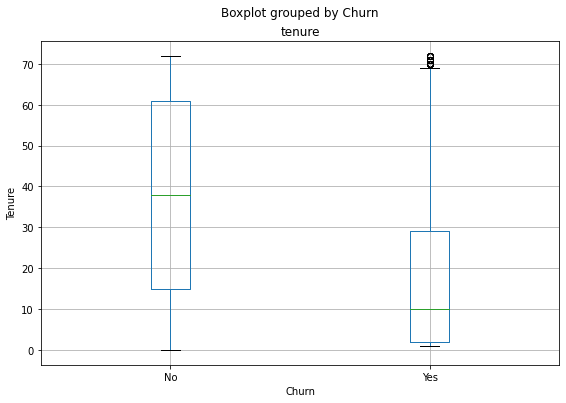

In [ ]:
# Tenure v/s Churn
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
telco.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

### Before we start predicting, an important step to do is to convert our **Churn** feature, which is a string, into integer. *Yes* will be converted to 1 and *No* will be converted to 0. We will name this new columns a "class".

In [ ]:
# Creating a class Yes = 1 (churn) and No = 0 (not churn)
telco['class'] = telco['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
telco.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0


In [ ]:
# telco['class'] = telco['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# # features will be saved as X and our target will be saved as y
# X = telco[['tenure','MonthlyCharges']]
# y = telco['class']

In [ ]:
# dependent_variable = telco['class']
# dependent_variable[0:5]

In [ ]:
# independent_variable = telco[['tenure','MonthlyCharges']]
# independent_variable[0:5]

In [ ]:
# X is a independent variables
X = telco[['tenure','MonthlyCharges']]
X[0:4]

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30


In [ ]:
# y is a dependent variables
y = telco['class']
y[0:4]

0    0
1    0
2    1
3    0
Name: class, dtype: int64

## <b> Splitting data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [ ]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

## <b>Fitting logistic regression on train data

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Get the model score
log_reg.score(X_train, y_train)

0.7857649982250621

In [ ]:
#Get the model intercept
log_reg.intercept_

array([-1.77408975])

In [ ]:
# Get the model coefficients
log_reg.coef_

array([[-0.05646728,  0.03315385]])

## <b> Apply logistic regression model on test data

In [ ]:
# Get the predicted probabilities
train_preds_prob = log_reg.predict_proba(X_train)
test_preds_prob = log_reg.predict_proba(X_test)

In [ ]:
# Train data probability
train_preds_prob[0:1]

array([[0.95339588, 0.04660412]])

In [ ]:
# Test data probability
test_preds_prob[0:1]

array([[0.7145149, 0.2854851]])

In [ ]:
# Get the predicted classes
train_class_preds = log_reg.predict(X_train)
test_class_preds = log_reg.predict(X_test)

In [ ]:
train_class_preds[0:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
test_class_preds[0:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

## Creating Confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

#<b> <u>Learning about the confusion matrix

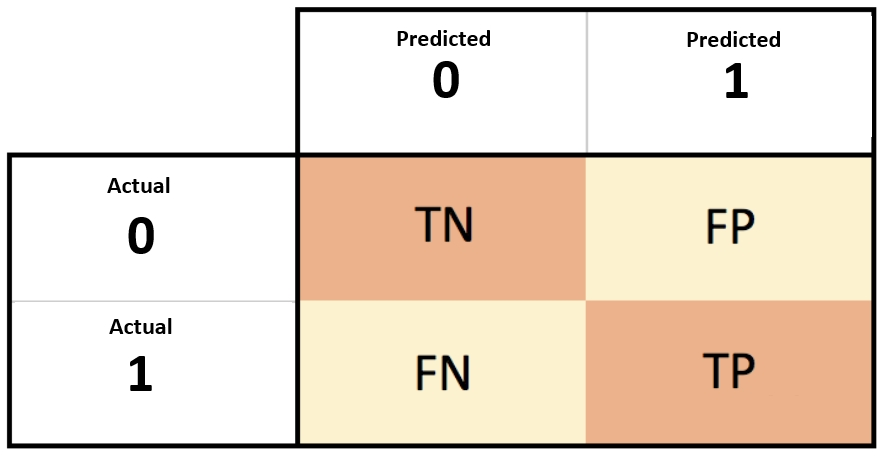

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

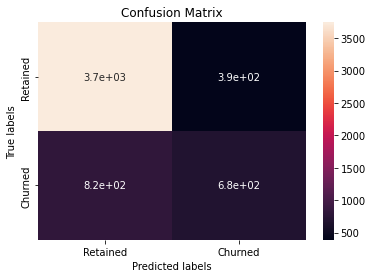

In [ ]:
# Get the confusion matrix for both train

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

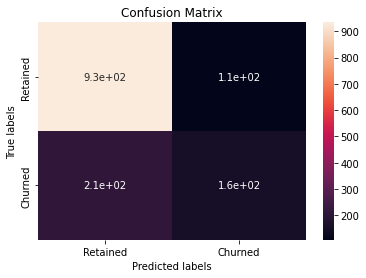

In [ ]:
# Get the confusion matrix for both test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## <b>Evaluation metrics for logistic regression models

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


In [ ]:
# Precision
from sklearn.metrics import precision_score
train_precision = precision_score(train_class_preds,y_train)
test_precision = precision_score(test_class_preds,y_test)

print("The Precision on train data is ", train_precision)
print("The Precision on test data is ", test_precision)

The Precision on train data is  0.45436375749500335
The Precision on test data is  0.42391304347826086


In [ ]:
# Recall
from sklearn.metrics import recall_score
train_recall = recall_score(train_class_preds,y_train)
test_recall = recall_score(test_class_preds,y_test)

print("The Recall on train data is ", train_recall)
print("The Recall on test data is ", test_recall)

The Recall on train data is  0.6373831775700934
The Recall on test data is  0.5931558935361216


In [ ]:
# F1_Score
from sklearn.metrics import f1_score
train_f1 = f1_score(train_class_preds,y_train)
test_f1 = f1_score(test_class_preds,y_test)

print("The F1_Score on train data is ", train_f1)
print("The F1_Score on test data is ", test_f1)

The F1_Score on train data is  0.5305328665888759
The F1_Score on test data is  0.49445324881141045


In [ ]:
# log_loss
from sklearn.metrics import log_loss
train_log_loss = log_loss(train_class_preds,y_train)
test_log_loss = log_loss(test_class_preds,y_test)

print("The log_loss on train data is ", train_log_loss)
print("The log_loss on test data is ", test_log_loss)

The log_loss on train data is  7.399531057677056
The log_loss on test data is  7.819758115423499


In [ ]:
# AUC_ROC
from sklearn.metrics import roc_auc_score
train_roc_auc = roc_auc_score(train_class_preds,y_train)
test_roc_auc = roc_auc_score(test_class_preds,y_test)

print("The roc_auc on train data is ", train_f1)
print("The roc_auc on test data is ", test_f1)

The roc_auc on train data is  0.5305328665888759
The roc_auc on test data is  0.49445324881141045


## <b>Implementing Ridge Regularized on Logistic Regression

In [ ]:
ridge_log = LogisticRegression(penalty='l2', C=1, solver= 'liblinear')
ridge_log.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [ ]:
ridge_log.score(X_train, y_train)

0.7855875044373447

In [ ]:
#Get the model intercept
ridge_log.intercept_

array([-1.75639214])

In [ ]:
#Get the model coeficient
ridge_log.coef_

array([[-0.05644497,  0.03292783]])

## Apply ridge logistic regression model on test data

In [ ]:
# Get the predicted probabilities
train_preds_prob_ridge = ridge_log.predict_proba(X_train)
test_preds_prob_ridge = ridge_log.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds_ridge = ridge_log.predict(X_train)
test_class_preds_ridge = ridge_log.predict(X_test)

In [ ]:
print(train_class_preds_ridge)
print(test_class_preds_ridge)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]


# Confusion Matrix for Ridge Logistic Regression 

[[3746  387]
 [ 821  680]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

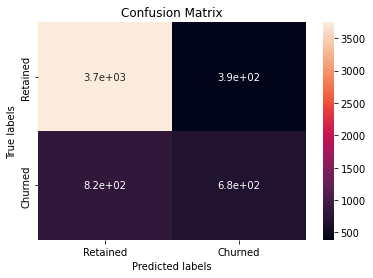

In [ ]:
# Get the confusion matrix for both train

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds_ridge)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[935 106]
 [211 157]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

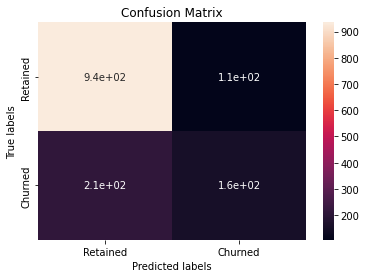

In [ ]:
# Get the confusion matrix for both test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds_ridge)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Evaluation metrics for Ridge logistic regression models

In [ ]:
train_accuracy_ridge = accuracy_score(train_class_preds_ridge,y_train)
test_accuracy_ridge = accuracy_score(test_class_preds_ridge,y_test)

train_precision_ridge = precision_score(train_class_preds_ridge,y_train)
test_precision_ridge = precision_score(test_class_preds_ridge,y_test)

train_recall_ridge = recall_score(train_class_preds_ridge,y_train)
test_recall_ridge = recall_score(test_class_preds_ridge,y_test)

train_f1_ridge = f1_score(train_class_preds_ridge,y_train)
test_f1_ridge = f1_score(test_class_preds_ridge,y_test)

train_log_loss_ridge = log_loss(train_class_preds_ridge,y_train)
test_log_loss_ridge = log_loss(test_class_preds_ridge,y_test)

train_roc_auc_ridge = roc_auc_score(train_class_preds_ridge,y_train)
test_roc_auc_ridge = roc_auc_score(test_class_preds_ridge,y_test)

In [ ]:
print("The accuracy on train data is ", train_accuracy_ridge)
print("The accuracy on test data is ", test_accuracy_ridge)

print("The Precision on train data is ", train_precision_ridge)
print("The Precision on test data is ", test_precision_ridge)

print("The Recall on train data is ", train_recall_ridge)
print("The Recall on test data is ", test_recall_ridge)

print("The F1_Score on train data is ", train_f1_ridge)
print("The F1_Score on test data is ", test_f1_ridge)

print("The log_loss on train data is ", train_log_loss_ridge)
print("The log_loss on test data is ", test_log_loss_ridge)

print("The roc_auc on train data is ", train_f1_ridge)
print("The roc_auc on test data is ", test_f1_ridge)

The accuracy on train data is  0.7855875044373447
The accuracy on test data is  0.7750177430801988
The Precision on train data is  0.4530313124583611
The Precision on test data is  0.4266304347826087
The Recall on train data is  0.6373008434864105
The Recall on test data is  0.596958174904943
The F1_Score on train data is  0.5295950155763239
The F1_Score on test data is  0.49762282091917587
The log_loss on train data is  7.405661759769667
The log_loss on test data is  7.770731605567394
The roc_auc on train data is  0.5295950155763239
The roc_auc on test data is  0.49762282091917587
